# Entregable 3
## Inteligencia Artificial

En este entregable se realizará la aplicación de los clasificadores Máquinas de Vectores de Soporte (SVM), Redes Neuronales y Reducción de Dimensión.

## SVM:

Estos puntos los deben trabajar con **alguno (o si prefieren, todos)** de los conjuntos de datos del proyecto final. Trabajar con las tres clases aprovechando que `sklearn` utiliza el esquema uno-contra-todos (one-vs-rest OvR)

Realizar las siguientes tareas:

1. Entrenar un modelo de SVM con el conjunto de entrenamiento
2. Reportar los resultados logrados con el conjunto de validación en términos de precisión, recall y F1-score. Para este punto pueden usar [classification_report de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)
3. Mostrar una matriz de confusión para la clasificación hecha en el conjunto de validación

In [18]:
#celda para importar, pueden agregar las que requieran

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

Celda para la carga de datos:

In [4]:
with open('./ais_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_ai = unserialized_data['X']
    y_ai = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [27]:
with open('./vgg_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_vgg = unserialized_data['X']
    y_vgg = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [28]:
with open('./yamn_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_yamn = unserialized_data['X']
    y_yamn = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [29]:
with open('./panns_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_panns = unserialized_data['X']
    y_panns = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [30]:
print(np.unique(y_ai, return_counts=True)) # Las etiquetas son 0, 1 y 2. Hacen referencia a lo siguiente:
NumtoCover = {0: 'Pastizal', 1:'Sabana', 2:'Bosque'}

(array([0., 1., 2.]), array([41957, 14994, 14546]))


# Imputación y normalización de datos

## ais_perRow

### Imputación y normalización de datos

In [5]:
nan_indices = np.isnan(X_ai)
num_nan_per_column = np.sum(nan_indices, axis=0)
total_nan = np.sum(nan_indices)
print("Número total de valores NaN en los datos originales:", total_nan)
print("Número de valores NaN por columna:")
print(num_nan_per_column)

Número total de valores NaN en los datos originales: 481
Número de valores NaN por columna:
[  0   0   0   0   0   0   0   0   0   0   0   0 478   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0
   0   0   0   0   0   0]


In [6]:
#selected_indices = np.where((y_ai == 1) | (y_ai == 2))[0]
X_selected_1 = X_ai
y_selected_1 = y_ai

In [7]:
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X_selected_1, y_selected_1, test_size=0.3, random_state=42)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, random_state=42)

In [8]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed_1 = imputer.fit_transform(X_train_1)
X_val_imputed_1 = imputer.transform(X_val_1)

scaler = MinMaxScaler()
X_train_imputed_1 = scaler.fit_transform(X_train_imputed_1)
X_val_imputed_1 = scaler.transform(X_val_imputed_1)

## vgg_perRow

### Imputación y normalización de datos

In [36]:
nan_indices = np.isnan(X_vgg)
num_nan_per_column = np.sum(nan_indices, axis=0)
total_nan = np.sum(nan_indices)
print("Número total de valores NaN en los datos originales:", total_nan)
print("Número de valores NaN por columna:")
print(num_nan_per_column)

Número total de valores NaN en los datos originales: 0
Número de valores NaN por columna:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
#selected_indices = np.where((y_ai == 1) | (y_ai == 2))[0]
X_selected_2 = X_vgg
y_selected_2 = y_vgg

In [38]:
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X_selected_2, y_selected_2, test_size=0.3, random_state=42)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, random_state=42)

In [39]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed_2 = imputer.fit_transform(X_train_2)
X_val_imputed_2 = imputer.transform(X_val_2)

scaler = MinMaxScaler()
X_train_imputed_2 = scaler.fit_transform(X_train_imputed_2)
X_val_imputed_2 = scaler.transform(X_val_imputed_2)

## yamn_perRow

### Imputación y normalización de datos

In [40]:
nan_indices = np.isnan(X_yamn)
num_nan_per_column = np.sum(nan_indices, axis=0)
total_nan = np.sum(nan_indices)
print("Número total de valores NaN en los datos originales:", total_nan)
print("Número de valores NaN por columna:")
print(num_nan_per_column)

Número total de valores NaN en los datos originales: 0
Número de valores NaN por columna:
[0 0 0 ... 0 0 0]


In [41]:
#selected_indices = np.where((y_ai == 1) | (y_ai == 2))[0]
X_selected_3 = X_yamn
y_selected_3 = y_yamn

In [42]:
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X_selected_3, y_selected_3, test_size=0.3, random_state=42)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, random_state=42)

In [43]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed_3 = imputer.fit_transform(X_train_3)
X_val_imputed_3 = imputer.transform(X_val_3)

scaler = MinMaxScaler()
X_train_imputed_3 = scaler.fit_transform(X_train_imputed_3)
X_val_imputed_3 = scaler.transform(X_val_imputed_3)

### panns_perRow

### Imputación y normalización de datos

In [44]:
nan_indices = np.isnan(X_panns)
num_nan_per_column = np.sum(nan_indices, axis=0)
total_nan = np.sum(nan_indices)
print("Número total de valores NaN en los datos originales:", total_nan)
print("Número de valores NaN por columna:")
print(num_nan_per_column)

Número total de valores NaN en los datos originales: 0
Número de valores NaN por columna:
[0 0 0 ... 0 0 0]


In [45]:
#selected_indices = np.where((y_ai == 1) | (y_ai == 2))[0]
X_selected_4 = X_panns
y_selected_4 = y_panns

In [46]:
X_train_4, X_temp_4, y_train_4, y_temp_4 = train_test_split(X_selected_4, y_selected_4, test_size=0.3, random_state=42)
X_val_4, X_test_4, y_val_4, y_test_4 = train_test_split(X_temp_4, y_temp_4, test_size=0.5, random_state=42)

In [47]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed_4 = imputer.fit_transform(X_train_4)
X_val_imputed_4 = imputer.transform(X_val_4)

scaler = MinMaxScaler()
X_train_imputed_4 = scaler.fit_transform(X_train_imputed_4)
X_val_imputed_4 = scaler.transform(X_val_imputed_4)

## Solución a punto 1.

## ais_perRow

In [ ]:
# Create an instance of the SVM classifier
svm1 = SVC()

# Train the SVM model with the training set
svm1.fit(X_train_imputed_1, np.squeeze(y_train_1))


SVC()

In [ ]:
y_pred_1 = svm1.predict(X_val_imputed_1)
print("Reporte de clasificación en el conjunto de validación:")
print(classification_report(y_val_1, y_pred_1))

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

         0.0       0.70      0.95      0.80      6333
         1.0       0.55      0.20      0.30      2163
         2.0       0.58      0.32      0.41      2229

    accuracy                           0.67     10725
   macro avg       0.61      0.49      0.51     10725
weighted avg       0.64      0.67      0.62     10725



In [ ]:
def plot_cm(y_test_1, predictions, filename=None, figsize=(8,8), ticklabels=None):
    cm = confusion_matrix(y_test_1, predictions, labels=np.unique(y_test_1))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    if ticklabels is None:
        ticklabels = list(range(1, len(np.unique(y_test_1))+1))
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '%.1f%%\n%d' % (0, 0)
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test_1), columns=np.unique(y_test_1))
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    fig, ax = plt.subplots(figsize=figsize)
    b = sns.heatmap(cm, cmap= "Greens", annot=annot, fmt='',cbar=False,linewidths=0.2, # type: ignore
                    yticklabels=ticklabels,xticklabels=ticklabels, ax=ax,annot_kws={"fontsize":24}) # type: ignore
    plt.tight_layout()
    ax.set_xticklabels(b.get_xticklabels(), size=16)
    ax.set_yticklabels(b.get_yticklabels(), size=16)
    if filename is not None:
        plt.savefig(filename, transparent=True, dpi=300)

/var/folders/rc/xt1rcjcn7nq5k_lmm5vpz4t40000gn/T/ipykernel_7533/3975229067.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


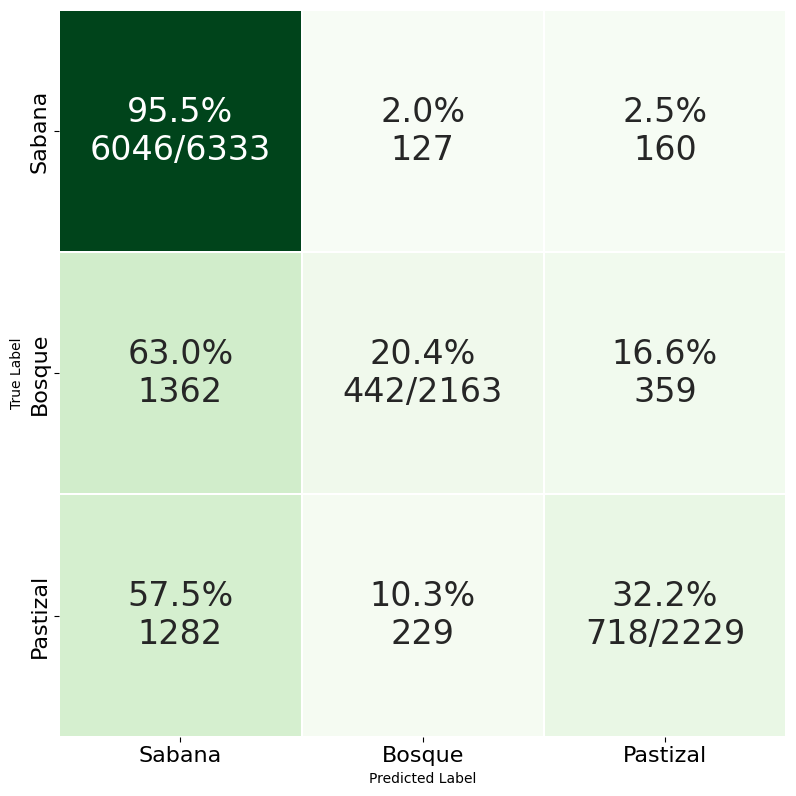

In [ ]:
plot_cm(y_val_1, y_pred_1, ticklabels=['Sabana', 'Bosque', 'Pastizal'])

## vgg_perRow

In [ ]:
# Create an instance of the SVM classifier
svm2 = SVC()

# Train the SVM model with the training set
svm2.fit(X_train_imputed_2, np.squeeze(y_train_2))


SVC()

In [ ]:
y_pred_2 = svm2.predict(X_val_imputed_2)
print("Reporte de clasificación en el conjunto de validación:")
print(classification_report(y_val_2, y_pred_2))

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      6333
         1.0       0.63      0.50      0.56      2163
         2.0       0.64      0.53      0.58      2229

    accuracy                           0.76     10725
   macro avg       0.70      0.66      0.67     10725
weighted avg       0.75      0.76      0.75     10725



In [ ]:
def plot_cm(y_test_2, predictions, filename=None, figsize=(8,8), ticklabels=None):
    cm = confusion_matrix(y_test_2, predictions, labels=np.unique(y_test_2))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    if ticklabels is None:
        ticklabels = list(range(1, len(np.unique(y_test_2))+1))
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '%.1f%%\n%d' % (0, 0)
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test_2), columns=np.unique(y_test_2))
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    fig, ax = plt.subplots(figsize=figsize)
    b = sns.heatmap(cm, cmap= "Greens", annot=annot, fmt='',cbar=False,linewidths=0.2, # type: ignore
                    yticklabels=ticklabels,xticklabels=ticklabels, ax=ax,annot_kws={"fontsize":24}) # type: ignore
    plt.tight_layout()
    ax.set_xticklabels(b.get_xticklabels(), size=16)
    ax.set_yticklabels(b.get_yticklabels(), size=16)
    if filename is not None:
        plt.savefig(filename, transparent=True, dpi=300)

/var/folders/rc/xt1rcjcn7nq5k_lmm5vpz4t40000gn/T/ipykernel_7533/3405943760.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


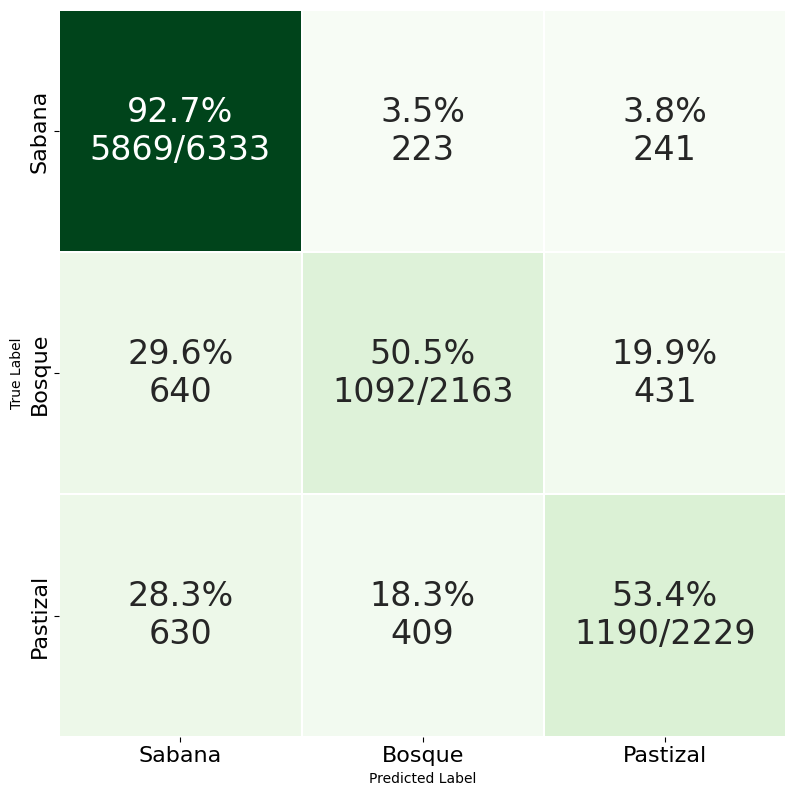

In [ ]:
plot_cm(y_val_2, y_pred_2, ticklabels=['Sabana', 'Bosque', 'Pastizal'])

## yamn_perRow

In [ ]:
# Create an instance of the SVM classifier
svm3 = SVC()

# Train the SVM model with the training set
svm3.fit(X_train_imputed_3, np.squeeze(y_train_3))


SVC()

In [ ]:
y_pred_3 = svm3.predict(X_val_imputed_3)
print("Reporte de clasificación en el conjunto de validación:")
print(classification_report(y_val_3, y_pred_3))

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      6333
         1.0       0.62      0.52      0.56      2163
         2.0       0.66      0.52      0.58      2229

    accuracy                           0.76     10725
   macro avg       0.70      0.66      0.67     10725
weighted avg       0.75      0.76      0.75     10725



In [ ]:
def plot_cm(y_test_3, predictions, filename=None, figsize=(8,8), ticklabels=None):
    cm = confusion_matrix(y_test_3, predictions, labels=np.unique(y_test_3))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    if ticklabels is None:
        ticklabels = list(range(1, len(np.unique(y_test_3))+1))
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '%.1f%%\n%d' % (0, 0)
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test_3), columns=np.unique(y_test_3))
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    fig, ax = plt.subplots(figsize=figsize)
    b = sns.heatmap(cm, cmap= "Greens", annot=annot, fmt='',cbar=False,linewidths=0.2, # type: ignore
                    yticklabels=ticklabels,xticklabels=ticklabels, ax=ax,annot_kws={"fontsize":24}) # type: ignore
    plt.tight_layout()
    ax.set_xticklabels(b.get_xticklabels(), size=16)
    ax.set_yticklabels(b.get_yticklabels(), size=16)
    if filename is not None:
        plt.savefig(filename, transparent=True, dpi=300)

/var/folders/rc/xt1rcjcn7nq5k_lmm5vpz4t40000gn/T/ipykernel_3126/112514972.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


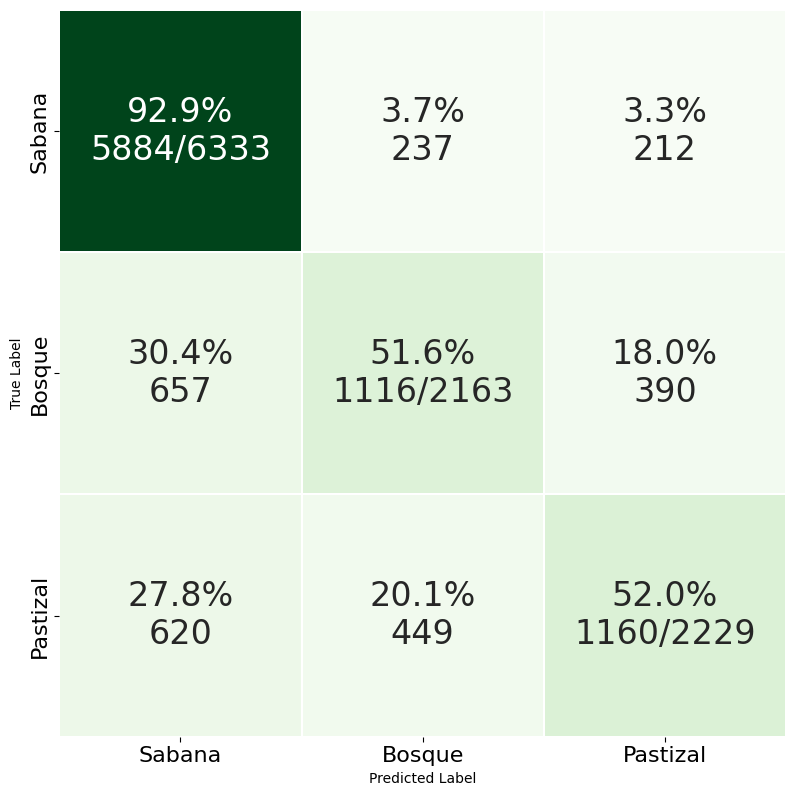

In [ ]:
plot_cm(y_val_3, y_pred_3, ticklabels=['Sabana', 'Bosque', 'Pastizal'])

## panns_perRow

In [ ]:
# Create an instance of the SVM classifier
svm4 = SVC()

# Train the SVM model with the training set
svm4.fit(X_train_imputed_4, np.squeeze(y_train_4))


SVC()

In [ ]:
y_pred_4 = svm4.predict(X_val_imputed_4)
print("Reporte de clasificación en el conjunto de validación:")
print(classification_report(y_val_4, y_pred_4))

Reporte de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      6333
         1.0       0.77      0.72      0.74      2163
         2.0       0.81      0.73      0.77      2229

    accuracy                           0.86     10725
   macro avg       0.83      0.80      0.81     10725
weighted avg       0.85      0.86      0.85     10725



In [ ]:
def plot_cm(y_test_4, predictions, filename=None, figsize=(8,8), ticklabels=None):
    cm = confusion_matrix(y_test_4, predictions, labels=np.unique(y_test_4))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    if ticklabels is None:
        ticklabels = list(range(1, len(np.unique(y_test_4))+1))
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '%.1f%%\n%d' % (0, 0)
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test_4), columns=np.unique(y_test_4))
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    fig, ax = plt.subplots(figsize=figsize)
    b = sns.heatmap(cm, cmap= "Greens", annot=annot, fmt='',cbar=False,linewidths=0.2, # type: ignore
                    yticklabels=ticklabels,xticklabels=ticklabels, ax=ax,annot_kws={"fontsize":24}) # type: ignore
    plt.tight_layout()
    ax.set_xticklabels(b.get_xticklabels(), size=16)
    ax.set_yticklabels(b.get_yticklabels(), size=16)
    if filename is not None:
        plt.savefig(filename, transparent=True, dpi=300)

/var/folders/rc/xt1rcjcn7nq5k_lmm5vpz4t40000gn/T/ipykernel_4225/2986100936.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


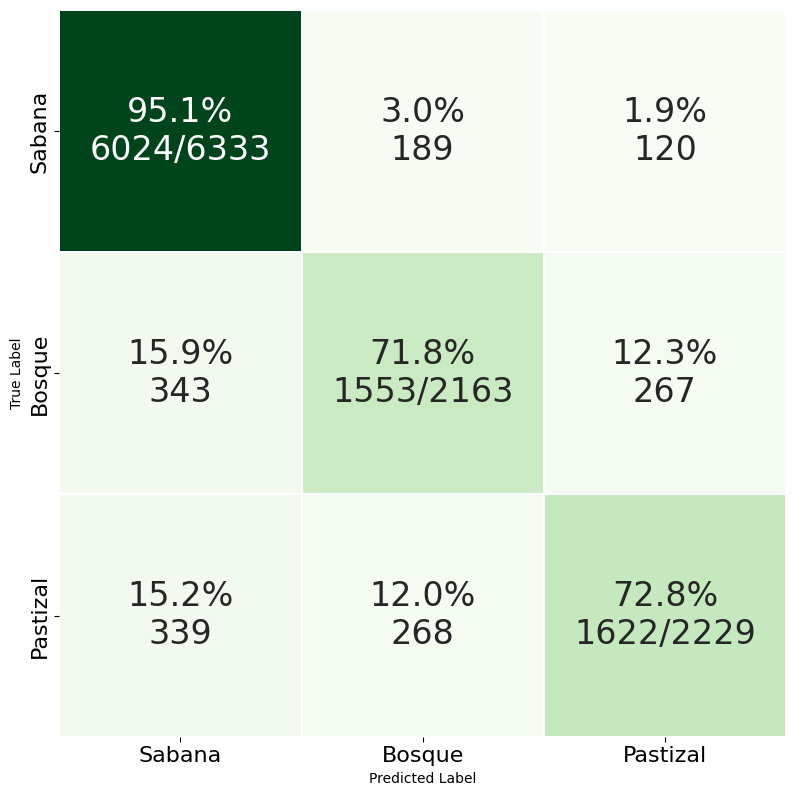

In [ ]:
plot_cm(y_val_4, y_pred_4, ticklabels=['Sabana', 'Bosque', 'Pastizal'])

## Redes Neuronales:

Estos puntos los deben trabajar con **alguno (o si prefieren, todos)** de los conjuntos de datos del proyecto final.

Realizar las siguientes tareas:

1. Diseñar tres redes neuronales para la tarea de clasificación. Creárlas con diferentes número de capas ocultas, número de neuronas y funciones de activación.
2. Entrenar las tres redes con el conjunto de entrenamiento.
3. Comparar los resultados logrados para el conjunto de validación en términos de precisión, recall y F1-score.
4. Mostrar las tres matrices de confusión logradas para el conjunto de validación.



# LECTURA DE DATOS (BORRAR PARA PRESENTAR) -- SE TIENE ACÁ PARA PROBAR RÁPIDO

# Solución a Punto 1

## ais_perRow

In [11]:
models = []

#Modelo 1: Una capa oculta, 64 neuronas, activación ReLU
model_1 = Sequential([
    Dense(64, input_shape=(X_train_imputed_1.shape[1],)),
    Activation('relu'),
    Dense(3, activation='softmax')
])
models.append(model_1)

#Modelo 2: Dos capas ocultas, 128 neuronas, activación tanh
model_2 = Sequential([
    Dense(128, input_shape=(X_train_imputed_1.shape[1],)),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(3, activation='softmax')
])
models.append(model_2)

#Modelo 3: Tres capas ocultas, 256 neuronas, activación sigmoid
model_3 = Sequential([
    Dense(256, input_shape=(X_train_imputed_1.shape[1],)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(3, activation='softmax')
])
models.append(model_3)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Solución a Puntos Restantes

Modelo 1:
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step
Precisión: 0.7019114219114219
Recall: 0.7019114219114219
F1-score: 0.6874648847995871
Confusion Matrix:


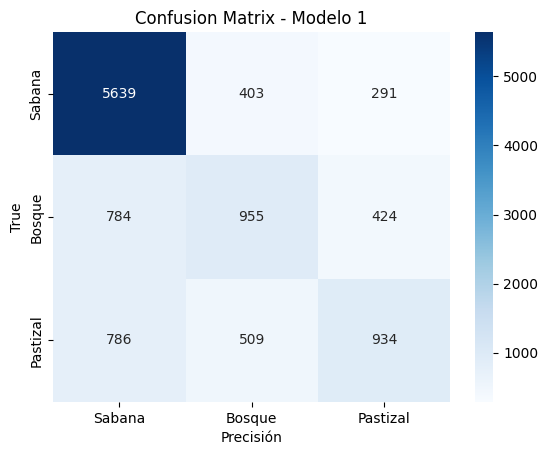


Modelo 2:
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
Precisión: 0.7407925407925408
Recall: 0.7407925407925408
F1-score: 0.7169242363817058
Confusion Matrix:


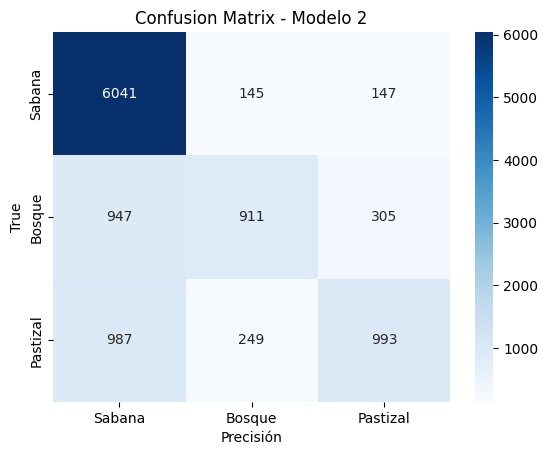


Modelo 3:
336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
Precisión: 0.782004662004662
Recall: 0.782004662004662
F1-score: 0.7810341364458946
Confusion Matrix:


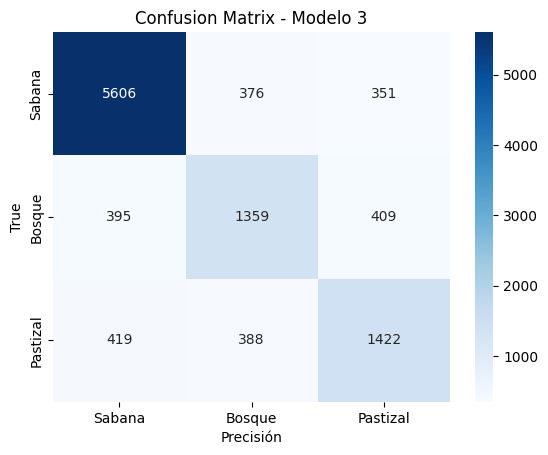

In [12]:
for i, model in enumerate(models, start=1):
    print(f"Modelo {i}:")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_imputed_1, y_train_1, epochs=20, batch_size=32, verbose=0)

    y_pred_1 = np.argmax(model.predict(X_val_imputed_1), axis=1)
    accuracy = accuracy_score(y_val_1, y_pred_1)
    recall = recall_score(y_val_1, y_pred_1, average='weighted')
    f1 = f1_score(y_val_1, y_pred_1, average='weighted')
    print("Precisión:", accuracy)
    print("Recall:", recall)
    print("F1-score:", f1)

    print("Confusion Matrix:")
    cm = confusion_matrix(y_val_1, y_pred_1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sabana', 'Bosque', 'Pastizal'], yticklabels=['Sabana', 'Bosque', 'Pastizal'])
    plt.xlabel('Precisión')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix - Modelo {i}")
    plt.show()
    print()

## Reducción de Dimensión:

1. Realizar reducción de dimensión con Análisis de Componentes Principales (PCA) para el (o los) conjuntos de datos usado(s) previamente. La reducción se puede hacer a una dimensión fija o reteniendo el porcentaje de varianza que definan. Sugerencia: usar fit_transform sobre datos de entrenamiento de [PCA de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform).
2. Entrenar los clasificadores SVM y Red Neuronal (solo la mejor de las tres redes) con los datos reducidos.
3. Reportar métricas de desempeño para los conjuntos de validación (este conjunto también debe ser reducido Sugerencia: usar transform sobre datos de validación de [PCA de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform)).


ELIMINAR PARA PRESENTACIÓN

## Solución a punto 1

In [14]:
pca_1 = PCA(n_components=0.95)  #95% de varianza
X_train_pca_1 = pca_1.fit_transform(X_train_imputed_1)
X_val_pca_1 = pca_1.transform(X_val_imputed_1)
print(f'Cantidad de componentes originales: {X_train_imputed_1.shape[1]}')   #original
print(f'Cantidad de componentes reducidos: {pca_1.n_components_}') #resultado reduccion

Cantidad de componentes originales: 60
Cantidad de componentes reducidos: 15


# Solución a Punto 2

In [15]:
#Entrenamiento de SVM
#menos parametros e iguales resultados en F1
svm_classifier = SVC()
svm_classifier.fit(X_train_pca_1, y_train_1)

#SVM clasificador
svm_pred = svm_classifier.predict(X_val_pca_1)
svm_accuracy = accuracy_score(y_val_1, svm_pred)
svm_recall = recall_score(y_val_1, svm_pred, average='weighted')
svm_f1 = f1_score(y_val_1, svm_pred, average='weighted')

print("SVM Metricas:")
print("Precisión:", svm_accuracy)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

#Mejor modelo -- ELIMINAR EN CASO DE QUE SEAN LAS DE ARRIBA
#model1
best_model = Sequential([
    Dense(256, input_shape=(X_train_pca_1.shape[1],)),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(3, activation='softmax')
])
best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
best_model.fit(X_train_pca_1, y_train_1, epochs=20, batch_size=32, verbose=0)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Metricas:
Precisión: 0.6964102564102564
Recall: 0.6964102564102564
F1-score: 0.665336001056972


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Solución a Punto 3

In [16]:
nn_pred = np.argmax(best_model.predict(X_val_pca_1), axis=1)
nn_accuracy = accuracy_score(y_val_1, nn_pred)
nn_recall = recall_score(y_val_1, nn_pred, average='weighted')
nn_f1 = f1_score(y_val_1, nn_pred, average='weighted')

print("\nRed Neuronal Metricas:")
print("Precisión:", nn_accuracy)
print("Recall:", nn_recall)
print("F1-score:", nn_f1)

  1/336 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step

336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step

Red Neuronal Metricas:
Precisión: 0.774918414918415
Recall: 0.774918414918415
F1-score: 0.7727444968411987
